In [1]:
%%capture
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip install pyvirtualdisplay
!pip install pyglet==1.5.1

In [2]:
%%capture
!pip install swig
!pip install gymnasium[box2d]
!pip install stable_baselines3

In [3]:
# Virtual Display
from pyvirtualdisplay import Display
import imageio

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [4]:
# NumPy
import numpy as np

# MatPlotLib
import matplotlib.pyplot as plt
%matplotlib inline

# Gym
import gymnasium as gym

# Stable Baselines
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
# Define Seeded Environment Creation
def make_seeded_env(rank: int, seed: int = 50):
    def _init():
        env = gym.make("CarRacing-v2", continuous=True, render_mode="rgb_array")
        env = gym.wrappers.GrayScaleObservation(env)
        env = gym.wrappers.FrameStack(env, 4)
        env.reset(seed = seed + rank)
        return env
    set_random_seed(seed)
    return _init

In [ ]:
# Define Unseeded Environment Creation
def make_unseeded_env(rank: int, seed: int = 50):
    def _init():
        env = gym.make("CarRacing-v2", continuous=True, render_mode="rgb_array")
        env = gym.wrappers.GrayScaleObservation(env)
        env = gym.wrappers.FrameStack(env, 4)
        env.reset(seed = np.random.randint(9999))
        return env
    set_random_seed(np.random.randint(9999))
    return _init

In [ ]:
# Define Recording Process (Adapted from Class Assignments)
def record_video(env, agent, out_directory, fps=30):
  images = []
  done = [False]
  state = vec_env.reset()
  img = vec_env.render(mode='rgb_array')
  images.append(img)
  total_step = 0
  while not any(done) and total_step <= 10000:
    # Take the action (index) that have the maximum expected future reward given that state
    action, _ = agent.predict(state)
    state, reward, done, info = vec_env.step(action) # We directly put next_state = state for recording logic
    img = vec_env.render(mode='rgb_array')
    images.append(img)
    total_step += 1
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

SEEDED EVALUATION

In [ ]:
# Make Evaluation/Recording Environment
vec_env = DummyVecEnv([make_seeded_env(0)])
vec_env = VecNormalize(vec_env, norm_reward=False)
_ = vec_env.reset()

In [ ]:
# Evaluation
model = PPO.load("ppo_carracing")
mean_reward, std_reward = evaluate_policy(model, vec_env, n_eval_episodes=10)

print(mean_reward, std_reward)

677.1284952230751 237.26076344279085


In [ ]:
# Record
record_video(vec_env, model, 'seeded_replay.mp4')

UNSEEDED EVALUATION

In [ ]:
# Make Evaluation/Recording Environment
vec_env = DummyVecEnv([make_unseeded_env(0)])
vec_env = VecNormalize(vec_env, norm_reward=False)
_ = vec_env.reset()

In [ ]:
# Evaluation
model = PPO.load("ppo_carracing")
mean_reward, std_reward = evaluate_policy(model, vec_env, n_eval_episodes=10)

print(mean_reward, std_reward)

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


591.9635081730783 211.40069599473964


In [ ]:
# Record
record_video(vec_env, model, 'unseeded_replay.mp4')

SAMPLE RESULTS & SAMPLE GRAPHS

In [5]:
timesteps = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

control_mean = [-48.07522962987423,
                169.23196376115084,
                492.90895173847673,
                148.77657257840036,
                394.0915129818022,
                448.1148546427488,
                348.03121475204824,
                609.3364371180535,
                545.2750342205167,
                522.605269471556]
control_dev = [45.66687364758861,
               138.26847993696143,
               314.892086672329,
               187.40784975608895,
               214.87846876388784,
               378.6473381138737,
               285.325231227268,
               234.19166343126022,
               269.5760905005281,
               252.97241026822888]

pt_only_mean = [-21.813477098941803,
                -12.453992227464914,
                -29.757496236264707,
                -85.3734246276319,
                -92.92052103132009,
                -76.48714018687606,
                -57.71685437262058,
                -67.01099306046963,
                -87.00543158352374,
                -28.926131387799977]
pt_only_dev = [50.23791046876233,
               79.20309688724981,
               38.727115547054176,
               15.405686170320251,
               0.6001151223220166,
               21.8244465014826,
               32.84453839491019,
               36.289392181150966,
               15.792310825719925,
               92.42155363377613]

halfsies_mean = [-21.813477098941803,
                 -12.453992227464914,
                 -29.757496236264707,
                 -85.3734246276319,
                 -92.92052103132009,
                 301.24912825450303,
                 403.333711951226,
                 548.6872661761939,
                 676.7151700697839,
                 655.1734473370016]
halfsies_dev = [50.23791046876233,
                79.20309688724981,
                38.727115547054176,
                15.405686170320251,
                0.6001151223220166,
                82.80825667399868,
                151.74394834038395,
                66.98684950444557,
                127.15441892844086,
                110.56360548336824]

full_mean = [152.00371483564376,
             428.1300849564374,
             510.8040171049535,
             529.8803184486926,
             504.70786495357754,
             360.8025470145047,
             480.9409361995757,
             392.75008980184793,
             429.22787026688457,
             355.1088084869087]
full_dev = [168.8319748041459,
            192.5237685188229,
            284.57785567335003,
            228.8449353125535,
            246.3681598025003,
            175.13776885514338,
            213.01645007414172,
            164.8023912434953,
            148.40808734408455,
            154.92073708505023]

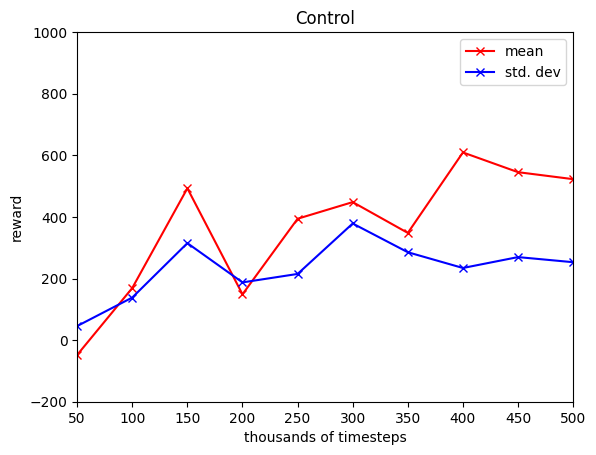

In [6]:
plt.title("Control")
plt.xlabel("thousands of timesteps")
plt.ylabel("reward")
plt.ylim(-200, 1000)
plt.xlim(50, 500)
plt.plot(timesteps, control_mean, marker='x', color='r', label = 'mean')
plt.plot(timesteps, control_dev, marker='x', color='b', label = 'std. dev')
plt.legend()

plt.show()

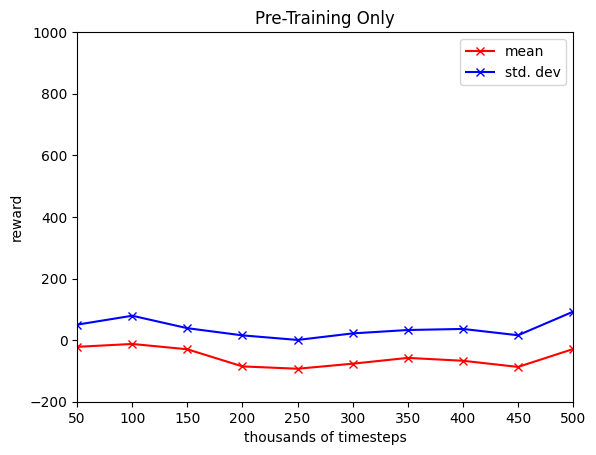

In [8]:
plt.title("Pre-Training Only")
plt.xlabel("thousands of timesteps")
plt.ylabel("reward")
plt.ylim(-200, 1000)
plt.xlim(50, 500)
plt.plot(timesteps, pt_only_mean, marker='x', color='r', label = 'mean')
plt.plot(timesteps, pt_only_dev, marker='x', color='b', label = 'std. dev')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


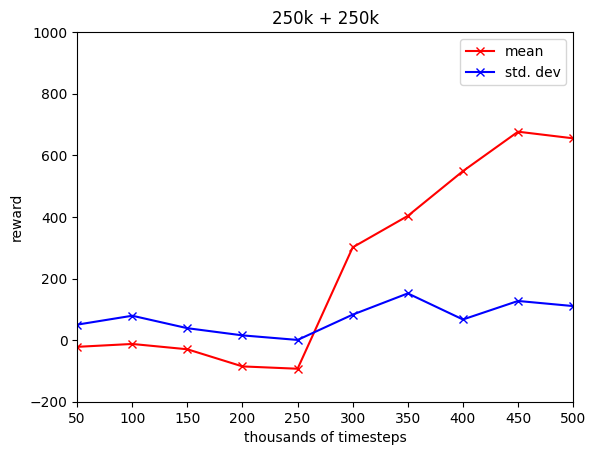

In [10]:
plt.title("250k + 250k")
plt.xlabel("thousands of timesteps")
plt.ylabel("reward")
plt.ylim(-200, 1000)
plt.xlim(50, 500)
plt.plot(timesteps, halfsies_mean, marker='x', color='r', label = 'mean')
plt.plot(timesteps, halfsies_dev, marker='x', color='b', label = 'std. dev')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


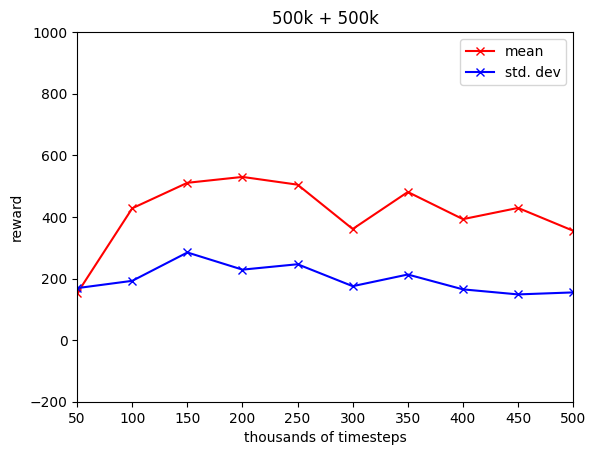

In [11]:
plt.title("500k + 500k")
plt.xlabel("thousands of timesteps")
plt.ylabel("reward")
plt.ylim(-200, 1000)
plt.xlim(50, 500)
plt.plot(timesteps, full_mean, marker='x', color='r', label = 'mean')
plt.plot(timesteps, full_dev, marker='x', color='b', label = 'std. dev')
plt.legend()

plt.show()